<a href="https://colab.research.google.com/github/branndonm1/branndonm1/blob/main/FCCTradingProj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Defs


In [ ]:
!pip install yfinance
import numpy as np #for handling arrays
import pandas as pd #for stats/excel type stuff

import seaborn as sns #for statistical plots
import matplotlib.pyplot as plt #for basic plotting

import yfinance as yf #api to get stock data from yahoo finance

import scipy


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# New Section

In [ ]:
stocks = input("Enter stocks tickers: ") #gets ticker input
data = yf.download(stocks, start="2000-03-01", end="2022-07-22") #download stock data between given dates


Enter stocks tickers: AAPL
[*********************100%***********************]  1 of 1 completed


In [ ]:
data.head() #shows first 5 rows

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-03-01,1.058594,1.179129,1.058036,1.163504,0.990279,1077003200
2000-03-02,1.133929,1.142299,1.077567,1.089286,0.927112,311259200
2000-03-03,1.114955,1.144950,1.071429,1.142857,0.972706,323366400
2000-03-06,1.125000,1.152902,1.116071,1.122210,0.955133,210560000
2000-03-07,1.128906,1.137835,1.081473,1.097098,0.933760,273011200


In [ ]:
data.shape #shows (rows, cols)

(5634, 6)

In [ ]:
data.describe() #give stats for each column

,Open,High,Low,Close,Adj Close,Volume
count,5634.000000,5634.000000,5634.000000,5634.000000,5634.000000,5.634000e+03
mean,27.732706,28.041308,27.428384,27.747259,26.493984,4.204256e+08
std,40.096034,40.582198,39.628705,40.127330,39.858184,3.886716e+08
min,0.231964,0.235536,0.227143,0.234286,0.199405,3.934000e+07
25%,1.879107,1.917500,1.846339,1.881250,1.601166,1.477691e+08
50%,12.424107,12.495000,12.334643,12.418393,10.569523,3.025134e+08
75%,32.158750,32.387500,32.000000,32.171874,29.104900,5.603283e+08
max,182.630005,182.940002,179.119995,182.009995,180.683868,7.421641e+09


In [ ]:
data.info() #give info about structure of data -- column names, number of filled entries, data type

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5634 entries, 2000-03-01 to 2022-07-21
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       5634 non-null   float64
 1   High       5634 non-null   float64
 2   Low        5634 non-null   float64
 3   Close      5634 non-null   float64
 4   Adj Close  5634 non-null   float64
 5   Volume     5634 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 308.1 KB


<Axes: xlabel='Date'>

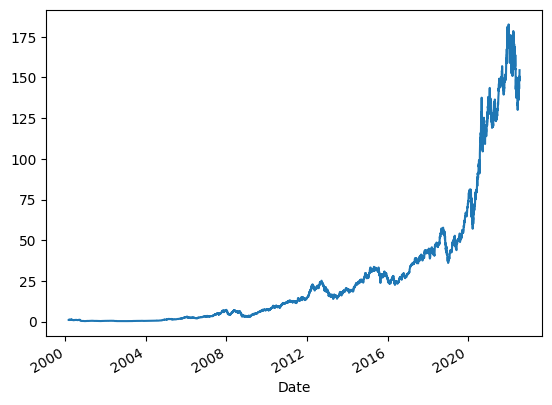

In [ ]:
data.Open.plot() #plots open prices over time

<Axes: xlabel='Date'>

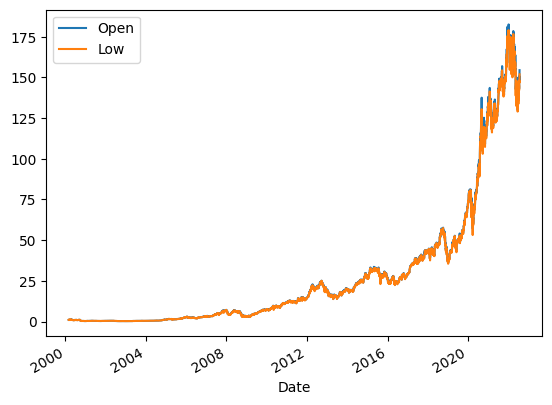

In [ ]:
data.plot(y=["Open", "Low"]) #plots open and low prices over time

<Axes: xlabel='Date'>

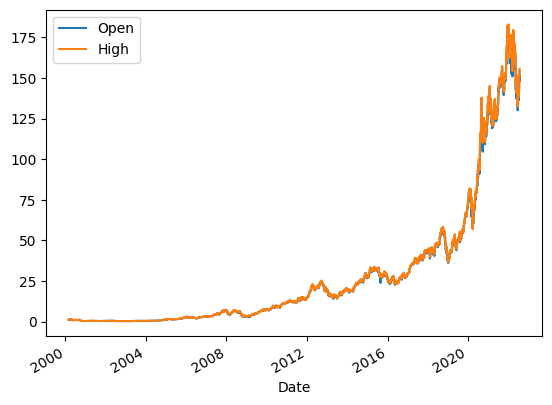

In [ ]:
data.plot(y=["Open", "High"]) #plots open and high prices vs time

<ipython-input-10-07156ad12565>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["Open"]) #plots probability distribution of open prices


<Axes: xlabel='Open', ylabel='Density'>

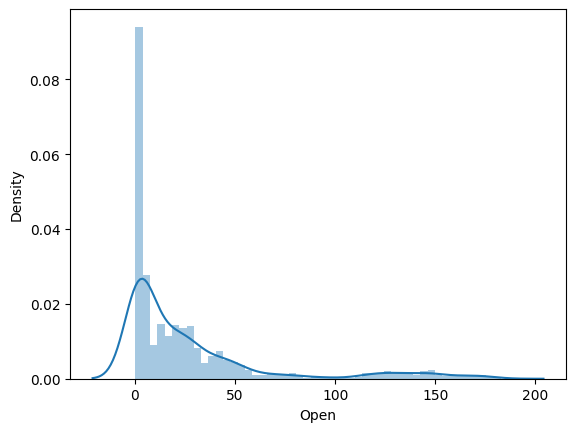

In [ ]:
sns.distplot(data["Open"]) #plots probability distribution of open prices

In [ ]:
#data prep for ML
#x is all columns except "Open"
#y is "Open" column
x = data.drop("Open", axis=1) #axis=1 for col, gets rid of "Open" col
y = data["Open"] # only "Open" col data

from sklearn.model_selection import train_test_split #import train test split method from sklearn package (within pandas)

x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.2, random_state=0) #RETURNS arrays with desired splitting of data for training and testing



In [ ]:
x.head()

,High,Low,Close,Adj Close,Volume
Date,,,,,
2000-03-01,1.179129,1.058036,1.163504,0.990279,1077003200
2000-03-02,1.142299,1.077567,1.089286,0.927112,311259200
2000-03-03,1.144950,1.071429,1.142857,0.972706,323366400
2000-03-06,1.152902,1.116071,1.122210,0.955133,210560000
2000-03-07,1.137835,1.081473,1.097098,0.933760,273011200


In [ ]:
y_test

Date
2016-05-26     24.920000
2010-11-08     11.328571
2010-09-21     10.137857
2015-08-14     28.580000
2006-03-01      2.458571
                 ...    
2020-04-06     62.724998
2022-06-28    142.130005
2019-09-30     55.224998
2001-02-09      0.366071
2020-03-03     75.917503
Name: Open, Length: 4508, dtype: float64

In [ ]:
from sklearn.linear_model import LinearRegression #import linear regression method from linear model packs in sklearn

lr = LinearRegression() #sets lr to linear regresison method
lr.fit(x_train, y_train) #fits models given the training data, find weights that will fit x to y
lr_pred =lr.predict(x_test) #given inputs preducts outputs, using found weights, feed in x to predict a y

lr_pred



array([24.82011269, 11.36907857, 10.22132264, ..., 55.46918168,
        0.36070437, 74.60148639])

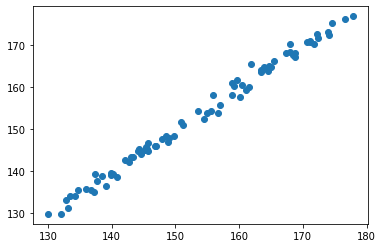

In [ ]:
plt.scatter(y_test, lr_pred)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, lr_pred)
rmse = np.sqrt(mse)
r2_score=r2_score(y_test, lr_pred)

print(mse)
print(rmse)
print(r2_score)

0.07013242783567146
0.264825277939383
0.9999451776165783


In [ ]:
from sklearn.linear_model import Lasso, Ridge

la = Lasso().fit(x_train, y_train) #fit with Lasso:linear model that disregards less "important" features
ri = Ridge().fit(x_train, y_train) #fit with Ridge:linear model that "penalizes" less "important" features

la_pred = la.predict(x_test)
ri_pred = ri.predict(x_test)

In [ ]:
mse = mean_squared_error(y_test, la_pred)


print(mse)


0.14761461273375787


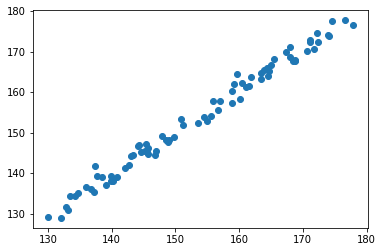

In [ ]:
plt.scatter(y_test, la_pred)

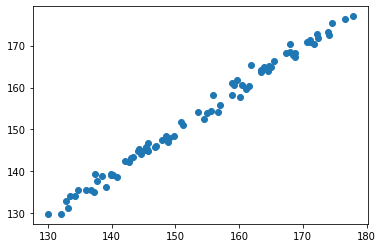

In [ ]:
plt.scatter(y_test, ri_pred)

In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

svr = SVR()

param_grid = {'C': [.1, 1, 10,100,1000], 'gamma': [1,.1,.01,.001, .0001], 'kernel' : ['rbf']}

grid = GridSearchCV(SVR(), param_grid, refit=True, verbose=3)
grid.fit(x_train, y_train)

In [ ]:
grid.best_estimator_

SVR(C=100, gamma=1)

In [ ]:
svr=SVR(C=100,gamma=1, kernel='rbf')
svr.fit(x_train, y_train)
svr_pred = svr.predict(x_test)
svr_pred

array([27.28872874, 27.28872874, 27.28872874, ..., 27.28872874,
       27.28872874, 27.28872874])

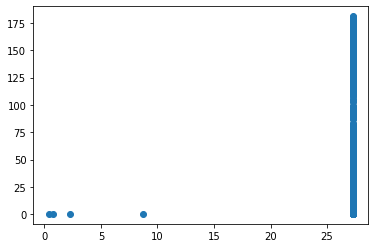

In [ ]:
plt.scatter(svr_pred, y_test)

In [ ]:
import joblib
joblib.dump(lr,'lr_model')
model = joblib.load("lr_model")
